In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# Load datasets
df = pd.read_csv('Bank_Data/bank-additional-full.csv',sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# convert the subscription columns to number
df['conversion'] = df['y'].apply(lambda x: 1 if x=='yes' else 0)

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,conversion
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


## Aggregate conversion rate

In [8]:
# Total conversion
df.conversion.sum()

4640

In [9]:
#Calculate the total number of clients
df.shape[0]

41188

In [10]:
print('Total Conversion: %i out of %i' % (df.conversion.sum(), df.shape[0]))

Total Conversion: 4640 out of 41188


In [11]:
print("Conversion Rate: %0.2f%%" %(df.conversion.sum()/df.shape[0] *100))

Conversion Rate: 11.27%


## Conversion rate by age

In [16]:
conversion_by_age = pd.DataFrame(df.groupby(by='age')['conversion'].sum()/df.groupby(by='age')['conversion'].count() * 100)
conversion_by_age

,conversion
age,
17,40.000000
18,42.857143
19,47.619048
20,35.384615
21,28.431373
...,...
91,0.000000
92,75.000000
94,0.000000


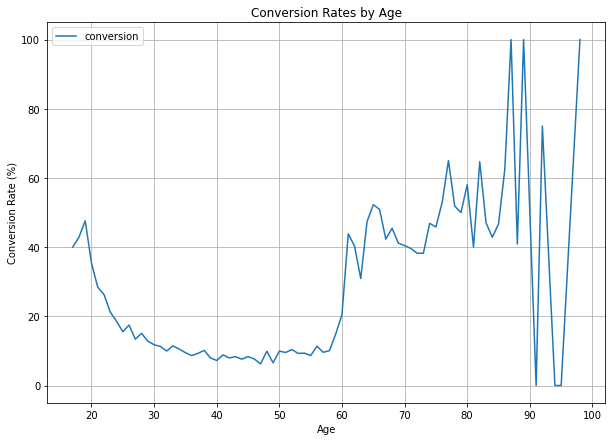

In [22]:
# Visualize conversion by age
ax = conversion_by_age.plot(grid=True,
                            figsize=(10,7),
                            title='Conversion Rates by Age')

ax.set_xlabel('Age')
ax.set_ylabel('Conversion Rate (%)')
plt.show()

In [23]:
# To reduce the noise in data group multiple ages together
df['age_group'] = df['age'].apply(lambda x: '[18-30]' if x < 30 else '[30-40]' if x < 40\
                                 else '[40-50]' if x <50 else '[50-60] ' if x < 60\
                                 else '[60-70]' if x < 70 else '70+')

In [25]:
conversion_by_age_group = pd.DataFrame(df.groupby(by='age_group')['conversion'].sum()/ 
                                       df.groupby(by='age_group')['conversion'].count() * 100)

In [26]:
conversion_by_age_group

,conversion
age_group,
70+,47.121535
[18-30],16.263891
[30-40],10.125162
[40-50],7.923238
[50-60],10.157389
[60-70],34.668508


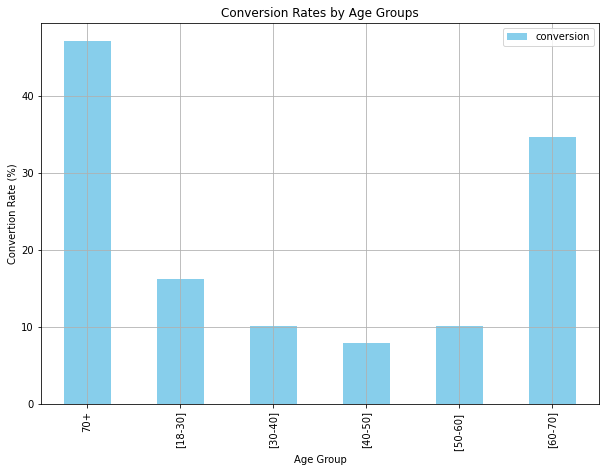

In [29]:
ax = conversion_by_age_group.plot(
kind='bar',
color='skyblue',
figsize=(10,7),
grid=True,
title='Conversion Rates by Age Groups')
ax.set_xlabel('Age Group')
ax.set_ylabel('Convertion Rate (%)')
plt.show()

## Conversion vs Non-Conversions

In [35]:
# conversion vs non-conversion by marital status
con_by_mar = pd.pivot_table(df, values='y', index='marital', columns='conversion', aggfunc=len)

In [39]:
con_by_mar.columns=['non_conversions', 'conversions']
con_by_mar

,non_conversions,conversions
marital,,
divorced,4136,476
married,22396,2532
single,9948,1620
unknown,68,12


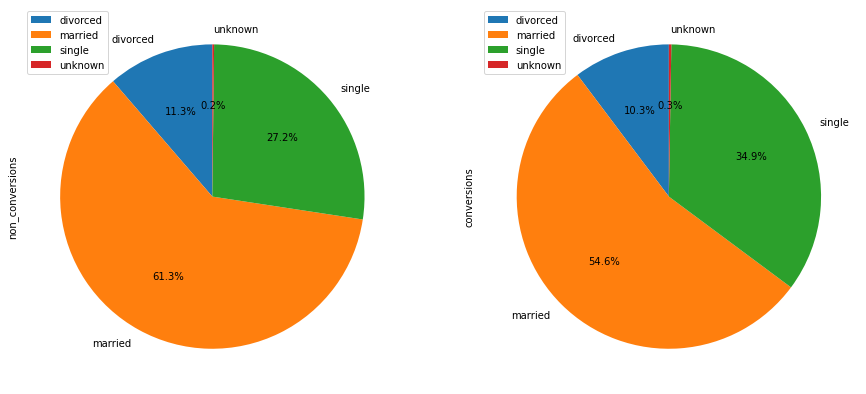

In [41]:
con_by_mar.plot(
kind='pie',
figsize=(15,7),
startangle=90,
subplots=True,
autopct=lambda x: '%0.1f%%' %x)

plt.show()

In [46]:
#Conversion by age and marital status
age_marital_df = df.groupby(['age_group', 'marital'])['conversion'].sum().unstack('marital').fillna(0)

age_marital_df = age_marital_df.divide(df.groupby(by='age_group')['conversion'].count(), axis=0)

In [47]:
age_marital_df

marital,divorced,married,single,unknown
age_group,,,,
70+,0.136461,0.321962,0.012793,0.000000
[18-30],0.002117,0.027871,0.132475,0.000176
[30-40],0.007557,0.052958,0.040383,0.000354
[40-50],0.011970,0.054627,0.012350,0.000285
[50-60],0.017342,0.077674,0.006412,0.000146
[60-70],0.037293,0.301105,0.006906,0.001381


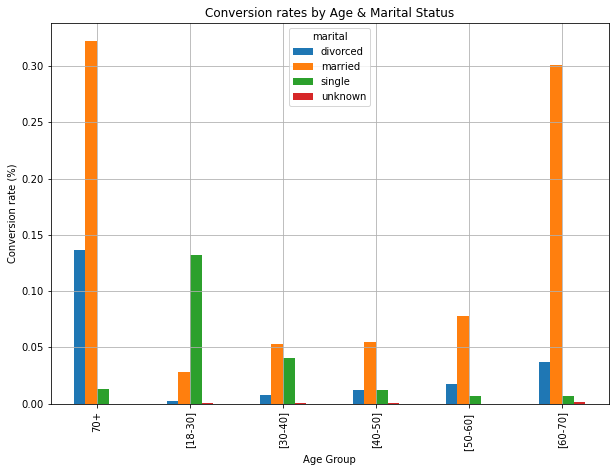

In [50]:
# Visualize
ax = age_marital_df.plot(
kind='bar',
grid=True,
figsize=(10,7)
)
ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('Age Group')
ax.set_ylabel('Conversion rate (%)')

plt.show()


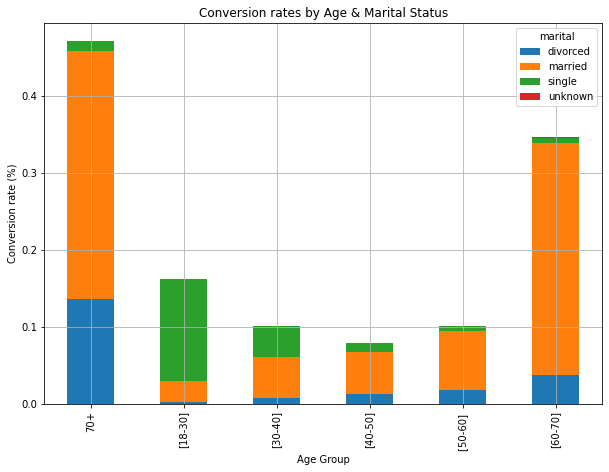

In [52]:
# Stack the bar
ax = age_marital_df.plot(
kind='bar',
stacked=True,
figsize=(10,7),
grid=True)

ax.set_title('Conversion rates by Age & Marital Status')
ax.set_xlabel('Age Group')
ax.set_ylabel('Conversion rate (%)')

plt.show()

In [54]:
# conversion by education
conversions_by_education_df = pd.pivot_table(df, values='y', index='education', columns='conversion', aggfunc=len)

conversions_by_education_df.columns = ['non_conversions', 'conversions']
conversions_by_education_df

,non_conversions,conversions
education,,
basic.4y,3748,428
basic.6y,2104,188
basic.9y,5572,473
high.school,8484,1031
illiterate,14,4
professional.course,4648,595
university.degree,10498,1670
unknown,1480,251


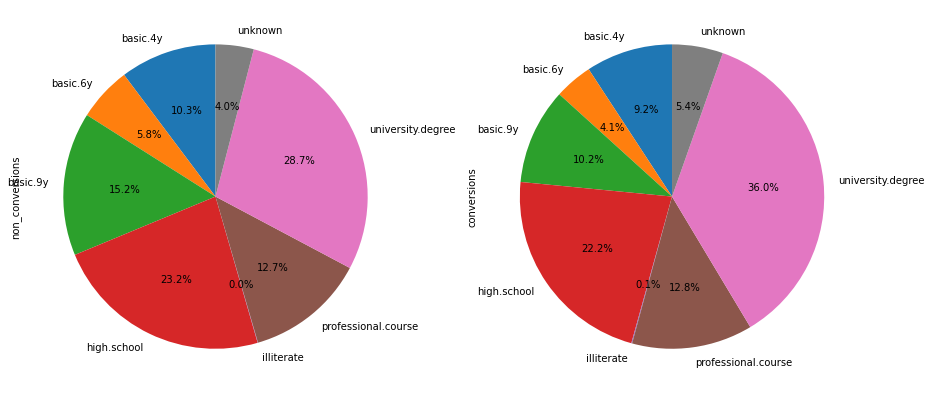

In [55]:
conversions_by_education_df.plot(
    kind='pie',
    figsize=(15, 7),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x,
    legend=False
)

plt.show()